In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Análise do dataset

In [2]:
# Carregando dados
airport_data = pd.read_csv('./../data/airports-database.csv')

In [3]:
# Visualizando a "cara" dos dados
airport_data.head().T

,0,1,2,3,4
id,0,1,2,3,4
year,2013,2013,2013,2013,2013
month,1,1,1,1,1
day,1,1,1,1,1
dep_time,517.0,533.0,542.0,544.0,554.0
sched_dep_time,515,529,540,545,600
dep_delay,2.0,4.0,2.0,-1.0,-6.0
arr_time,830.0,850.0,923.0,1004.0,812.0
sched_arr_time,819,830,850,1022,837
arr_delay,11.0,20.0,33.0,-18.0,-25.0


Alguns pré-processamentos

In [4]:
# Voos cancelados: todos que NUNCA DECOLARAM e que NUNCA POUSARAM
airport_data['cancelled'] = ((airport_data['dep_time'].isna()) & (airport_data['arr_time'].isna())).astype(int)

In [5]:
# Voos desviados: todos que DECOLARAM mas NUNCA POUSARAM (no lugar previsto)
airport_data['diverted'] = ((airport_data['cancelled'] == 0) & (airport_data['arr_time'].isna())).astype(int)

In [6]:
# Voos finalizados: todos os que DECOLARAM e POUSARAM no lugar previsto
airport_data['landed'] = ((airport_data['dep_time'].notna()) & (airport_data['arr_time'].notna())).astype(int)

# Respostas para as perguntas

1. Qual é o numero total de voos no conjunto de dados? <br>
2. Quantos voos foram cancelados?

In [7]:
print('Voos cancelados: {}'.format(airport_data['cancelled'].sum()))
print('Voos desviados: {}'.format(airport_data['diverted'].sum()))
print('Voos concluídos: {}'.format(airport_data['landed'].sum()))

print('\nTotal de voos: {}'.format(airport_data['cancelled'].sum() + airport_data['diverted'].sum() + airport_data['landed'].sum()))
print('Tamanho total do dataset: {}'.format(len(airport_data)))

Voos cancelados: 8255
Voos desviados: 458
Voos concluídos: 328063

Total de voos: 336776
Tamanho total do dataset: 336776


3. Qual o atraso médio na partida dos voos? (em minutos)

In [8]:
# Considerando todos os voos concluídos com sucesso:
airport_data[airport_data['landed'] == 1]['dep_delay'].mean()

12.575974736559747

4. Quais são os 5 aeroportos com maior número de pousos?

In [9]:
# airport_data[airport_data['landed'] == 1].groupby('dest').size().sort_values(ascending=False)
airport_data[airport_data['landed'] == 1]['dest'].value_counts().head(5)

dest
ATL    16873
ORD    16607
LAX    16058
BOS    15028
MCO    13979
Name: count, dtype: int64

5. Qual é a rota mais frequente (par origin-dest)?

In [10]:
# Cria uma tupla contendo (Origem, Destino) e conta as 5 que mais ocorrem
airport_data['route'] = airport_data.apply(lambda row: (row['origin'], row['dest']), axis=1)
airport_data['route'].value_counts().head(5)

route
(JFK, LAX)    11262
(LGA, ATL)    10263
(LGA, ORD)     8857
(JFK, SFO)     8204
(LGA, CLT)     6168
Name: count, dtype: int64

6. Quais são as 5 companhias aéreas com maior tempo médio de atraso na chegada? (Exiba também o tempo)

In [11]:
airport_data[airport_data['landed'] == 1].groupby('name')['arr_delay'].mean().sort_values(ascending=False).head(5)

name
Frontier Airlines Inc.         21.920705
AirTran Airways Corporation    20.115906
ExpressJet Airlines Inc.       15.796431
Mesa Airlines Inc.             15.556985
SkyWest Airlines Inc.          11.931034
Name: arr_delay, dtype: float64

7. Qual é o dia da semana com maior número de voos? <br>
R.: Segunda-feira

In [12]:
# Deixando coluna em formato datetime
airport_data['time_hour'] = pd.to_datetime(airport_data['time_hour'])

In [13]:
airport_data[airport_data['landed'] == 1]['time_hour'].dt.day_name().value_counts()

time_hour
Monday       49398
Tuesday      49223
Wednesday    48753
Friday       48642
Thursday     48568
Sunday       45583
Saturday     37896
Name: count, dtype: int64

8. Qual o percentual mensal dos voos tiveram atraso na partida superior a 30 minutos?

In [14]:
# Criação de nova coluna que contém indicador de atraso superior a 30 min
airport_data['30_min_late_dep'] = airport_data['dep_delay'].apply(lambda x: 1 if x > 30 else 0)

In [15]:
# Agregação dos voos atrasados em mais de 30 min na decolagem, por mês
late_departures_month = airport_data.groupby(airport_data['time_hour'].dt.month)['30_min_late_dep'].sum()

# Agregação de todos os voos, por mes
total_departures_month = airport_data.groupby(airport_data['time_hour'].dt.month).size()

# Porcentagem final
percentage_late_dep_month = late_departures_month/total_departures_month*100

Text(0, 0.5, '%% de voos > 30 min de atraso na decolagem')

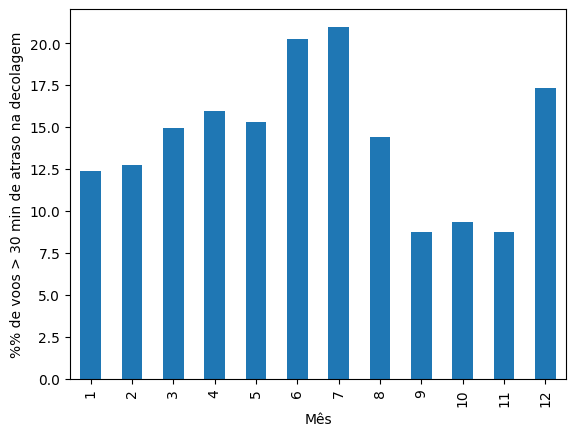

In [16]:
percentage_late_dep_month.plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('%% de voos > 30 min de atraso na decolagem')

9. Qual a origem mais comum para voos que pousaram em Seattle (SEA)?

In [17]:
airport_data[airport_data['dest'] == 'SEA']['origin'].value_counts()

origin
JFK    2092
EWR    1831
Name: count, dtype: int64

10. Qual é a média de atraso na partida dos voos (dep_delay) para cada dia da
semana?

In [18]:
airport_data.groupby(airport_data['time_hour'].dt.day_name())['dep_delay'].mean()

time_hour
Friday       14.696057
Monday       14.778937
Saturday      7.650502
Sunday       11.589532
Thursday     16.148920
Tuesday      10.631683
Wednesday    11.803512
Name: dep_delay, dtype: float64

11. Qual é a rota que teve o maior tempo de voo médio (air_time)?

In [19]:
airport_data[airport_data['landed'] == 1].groupby('route')['air_time'].mean().sort_values(ascending=False).head(5)

route
(JFK, HNL)    623.087719
(EWR, HNL)    612.075209
(EWR, ANC)    413.125000
(JFK, SFO)    347.403626
(JFK, SJC)    346.606707
Name: air_time, dtype: float64

Resposta: 623.08 minutos

12. Para cada aeroporto de origem, qual é o aeroporto de destino mais comum?

In [20]:
# Agrupando por origens e destinos e contando ocorrencias de cada combinação
aux = airport_data.groupby(['origin', 'dest']).size().reset_index(name='count')

# Para cada origem, encontra o destino mais frequente usando idxmax()
aux.loc[aux.groupby('origin')['count'].idxmax()]

,origin,dest,count
55,EWR,ORD,6100
117,JFK,LAX,11262
156,LGA,ATL,10263


In [21]:
del aux

13. Quais são as 3 rotas que tiveram a maior variação no tempo médio de voo (air_time)?

In [22]:
# Encontrar tempos minimos e maximos de voo por rota
routes = pd.DataFrame()
routes['min_air_time'] = airport_data.groupby('route')['air_time'].min()
routes['max_air_time'] = airport_data.groupby('route')['air_time'].max()

In [23]:
# Subtrair para encontrar o delta
routes['var_air_time'] = routes['max_air_time'] - routes['min_air_time']

In [24]:
routes.sort_values('var_air_time', ascending=False).head(3)

,min_air_time,max_air_time,var_air_time
route,,,
"(JFK, SFO)",301.0,490.0,189.0
"(JFK, LAX)",275.0,440.0,165.0
"(JFK, EGE)",219.0,382.0,163.0


14. Qual é a média de atraso na chegada para voos que tiveram atraso na partida superior a 1 hora?

In [25]:
# Criação de nova coluna que contém indicador de atraso superior a 60 min
airport_data['60_min_late_dep'] = airport_data['dep_delay'].apply(lambda x: 1 if x > 60 else 0)

In [26]:
# Valor em minutos
airport_data[airport_data['60_min_late_dep'] == 1]['arr_delay'].mean()

119.04880549963919

15. Qual é a média de voos diários para cada mês do ano?

In [27]:
# Quantidade de voos para cada data do ano
aux = airport_data[airport_data['landed'] == 1].groupby(airport_data['time_hour'].dt.date).size()

In [28]:
# Voltando a deixar em datetime
aux.index = pd.to_datetime(aux.index)

In [29]:
# Agora agrupando por mês mas fazendo a média
aux.groupby(aux.index.to_series().dt.month).mean()

time_hour
1     853.806452
2     845.000000
3     901.387097
4     920.666667
5     909.516129
6     905.700000
7     915.548387
8     929.709677
9     902.333333
10    923.935484
11    900.500000
12    873.419355
dtype: float64

In [30]:
del aux

16. Quais são as 3 rotas mais comuns que tiveram atrasos na chegada superiores a 30 minutos?

In [31]:
# Cria coluna para marcar pousos com atrasos superiores de 30 min na chegada
airport_data['30_min_late_arr'] = airport_data['arr_delay'].apply(lambda x: 1 if x > 30 else 0)

In [32]:
airport_data[airport_data['30_min_late_arr'] == 1].groupby('route').size().sort_values(ascending=False).head(3)

route
(LGA, ATL)    1563
(JFK, LAX)    1286
(LGA, ORD)    1188
dtype: int64

17. Para cada origem, qual o principal destino?

R.: mesma pergunta da 12?